### Eplison-Greedy

#### Motivación
Es *recurrente* calcular un promedio/varianza/probabilidad $f(X,n)$ con el paradigma bayesiano (inferencia).  

Cada vez que recabamos un nuevo dato, recalculamos $f(X,n)$, por lo que definir elementos $\bar{X}_{n}$ en términos de $\bar{X}_{n-1}$ resulta eficiente en términos de complejidad computacional, ya que pasamos de un algoritmo $\mathcal{O}(N)$ a uno $\mathcal{O}(1)$.

El dilema de *explotación-exploración* se puede resolver con variantes del algoritmo *epsilon-greedy*,  
que alterna el uso del *estimador máximo verosimil* (hasta el momento N) y experimenta un epsilon porcentaje de tiempo (o con probabilidad epsilon).

In [64]:
import matplotlib.pyplot as plt
import numpy as np

In [65]:
NUM_TRAILS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75] # win_rates

Algoritmo de actualización de $\bar{X}_{n}$ de forma *recursiva*:  
$\bar{X}_{n} \gets \frac{n-1}{n} \cdot \bar{X}_{n-1} + \frac{1}{n} \cdot X_n$

In [66]:
# Las filas marcadas con # TODO son el ejercicio a realizar, en este caso se presenta la solución.
# Por ejemplo inicializamos N=0 (self.N)

class Bandit:
    def __init__(self,p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0. # TODO ¿Por que no iniciar en p? No lo sé
        self.N = 0 # TODO
        
    def pull(self):
        #draw a 1 with probability p
        return np.random.random() 
    
    def update(self, x):
        self.N = self.N +1 # TODO
        # Algoritmo de actualización, con X_n = x
        self.p_estimate = ((self.N-1) / self.N)*self.p_estimate + (x / self.N)  # TODO 
        #self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


optimal j: 2
mean estimate: 0.4967404780953707
mean estimate: 0.4996483762523359
mean estimate: 0.4944486045743587
total reward earned: 49921.285288434236
overall win rate: 0.49921285288434236
num times explored: 9923
num times exploited: 90077
num times optimal bandit: 3676


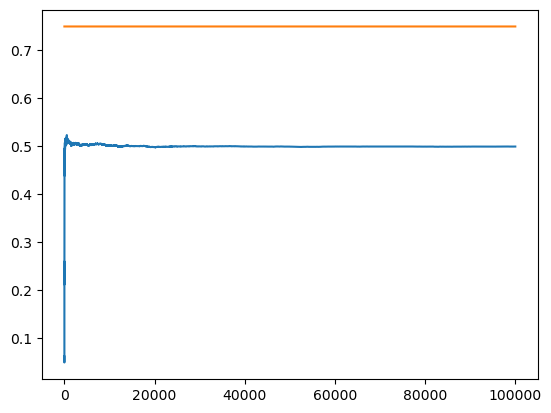

In [67]:
def experiment():
    
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRAILS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    # por construcción, debería de ser la máquina con índice 2 (Ver output), dado que p = 0.75 > otras p
    print("optimal j:", optimal_j) 
        
    for i in range(NUM_TRAILS):

        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored +=1
            # Asigna una máquina al azar
            j = np.random.randint(len(bandits)) # TODO 

        else: 
            num_times_exploited +=1
            # En la vida real, no lo sabríamos la p "real", pero esto es una simulación
            j =  np.argmax([b.p_estimate for b in bandits]) # TODO 
            
        if j ==optimal_j:
            num_optimal+= 1

        # pull the arm for the banidt with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:",rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRAILS)
    print("num times explored:", num_times_explored)
    print("num times exploited:", num_times_exploited)
    print("num times optimal bandit:", num_optimal)
        
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRAILS)+1) # para ir dividendo N, a medida que N crece
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRAILS)*np.max(BANDIT_PROBABILITIES))
    plt.show()
        
if __name__ == "__main__":
    experiment()

#### Segunda parte:
- Usar un epsilon decreciente
- Suponer que $ Reward \sim \mathcal{N}(\mu, \sigma^2) $, antes era 

In [79]:
class Bandit:
    def __init__(self,m):
        # p: the win rate
        self.m = m
        self.m_estimate = 0.
        self.N = 0
        
    def pull(self):
        # Random variable dist N(mu,1)
        return 1*np.random.randn() + self.m 
    
    def update(self, x):
        self.N = self.N +1
        # Algoritmo de actualización, con X_n = x
        self.m_estimate = ((self.N-1) / self.N)*self.m_estimate + (x / self.N) 

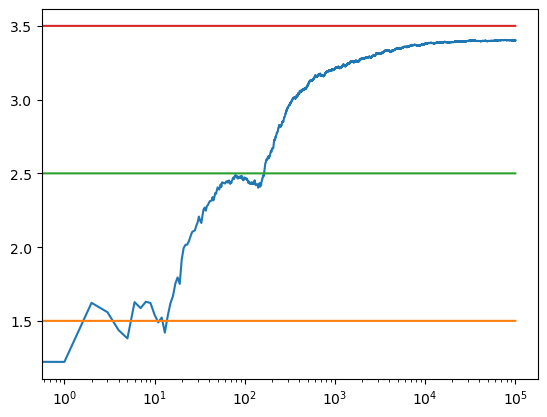

1.5070371286172142
2.5180357040290127
3.5022811927096114
percent suboptimal for epsilon = 0.1: 0.0682


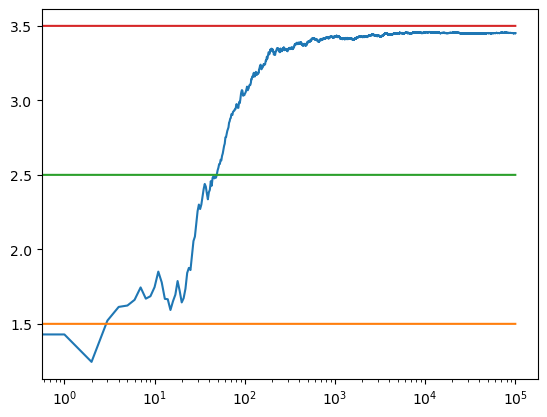

1.5286250672957928
2.485208712074491
3.4998557676749993
percent suboptimal for epsilon = 0.05: 0.03268


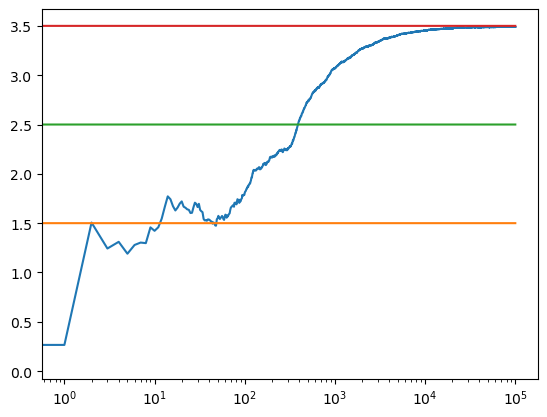

1.5301495408269465
2.5339901986656264
3.503489561556294
percent suboptimal for epsilon = 0.01: 0.00987


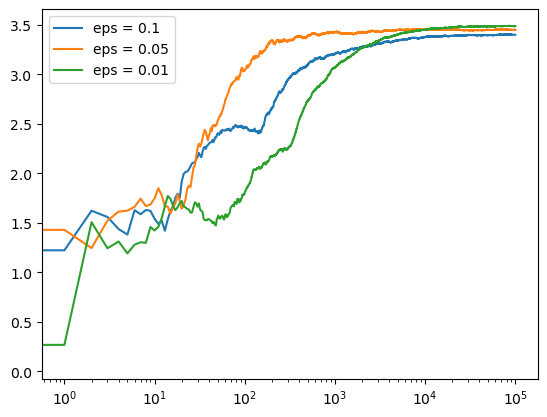

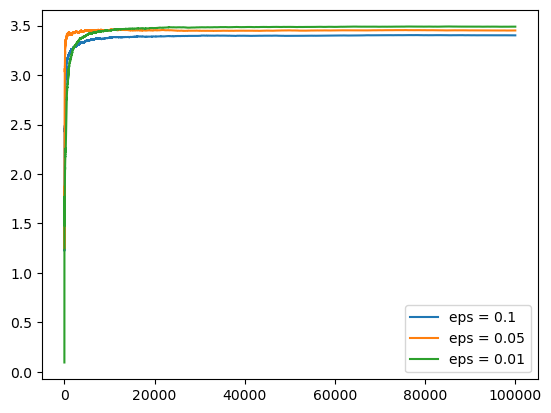

In [81]:
def experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    #Count number of suboptimal choices
    means = np.array([m1,m2,m3])
    true_best = np.argmax(means)
    count_suboptimal = 0
    num_times_exploited = 0
    num_optimal = 0
    
    data = np.empty(N)
    
    for i in range(N):
        #epsilon greedy
        p = np.random.random()
        
        if p < eps:
            j = np.random.choice(len(bandits)) # index de un sampleo del array bandits
        else:
            j = np.argmax([b.m_estimate for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        if j != true_best:
            count_suboptimal += 1
        
        # for the plot
        data[i] = x
    
    cumulative_average = np.cumsum(data) / (np.arange(N)+1)
    
    # plot  moving average CTR
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log') # zoom-in, ya que la convergencia es rápida
    plt.show()
    
    for b in bandits:
        print(b.m_estimate)
        
    print("percent suboptimal for epsilon = %s:" % eps, float(count_suboptimal) / N)
    
    return cumulative_average

if __name__ == '__main__':
    m1, m2, m3 = 1.5, 2.5, 3.5
    c_1  = experiment(m1, m2, m3, 0.1, 100000)
    c_05 = experiment(m1, m2, m3, 0.05, 100000)
    c_01 = experiment(m1, m2, m3, 0.01, 100000)
    
    # log scale
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()
    
    # linear scale
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.show()